In [1]:
import pandas as pd
df = pd.read_excel('data.xlsx')


In [3]:
df.head()

,price_RUB,country,experience,lessons,rating,reviews,user_id,prof_mean,prof_std,nice_mean,...,Italy,"Venezuela, Bolivarian Republic of",Colombia,Canada,Poland,Mexico,B2,C1,C2,Native
0,1678.00,United States,5,14,0.0,0,1,6.0,1.22,7.25,...,0,0,0,0,0,0,0,0,0,1
1,1141.00,United States,75,3,5.0,2,2,6.0,1.22,4.75,...,0,0,0,0,0,0,0,0,0,1
2,1197.21,United States,3531,2,4.9,117,3,5.0,1.22,4.50,...,0,0,0,0,0,0,0,0,0,1
3,1662.79,United States,442,21,4.8,9,6,9.0,0.00,6.00,...,0,0,0,0,0,0,0,0,0,1
4,864.65,United States,4,2,0.0,0,7,7.5,1.50,5.75,...,0,0,0,0,0,0,0,0,0,1


In [10]:
df[['price_RUB', 'country', 'experience', 'lessons', 'rating', 'reviews',
       'user_id', 'prof_mean', 'prof_std', 'nice_mean', 'nice_std', 'number_subjects',
       'number_langs', 'length_descr']]

Index(['price_RUB', 'country', 'experience', 'lessons', 'rating', 'reviews',
       'user_id', 'prof_mean', 'prof_std', 'nice_mean', 'nice_std',
       'HasFrench', 'HasRussian', 'HasSpanish', 'HasGerman', 'HasItalian',
       'HasSerbian', 'HasPortuguese', 'HasArabic', 'number_subjects',
       'number_langs', 'length_descr', 'is_developed', 'Ukraine',
       'United States', 'United Kingdom', 'Russian Federation', 'Serbia',
       'Philippines', 'South Africa', 'Brazil', 'India', 'Nigeria', 'Italy',
       'Venezuela, Bolivarian Republic of', 'Colombia', 'Canada', 'Poland',
       'Mexico', 'B2', 'C1', 'C2', 'Native'],
      dtype='object')

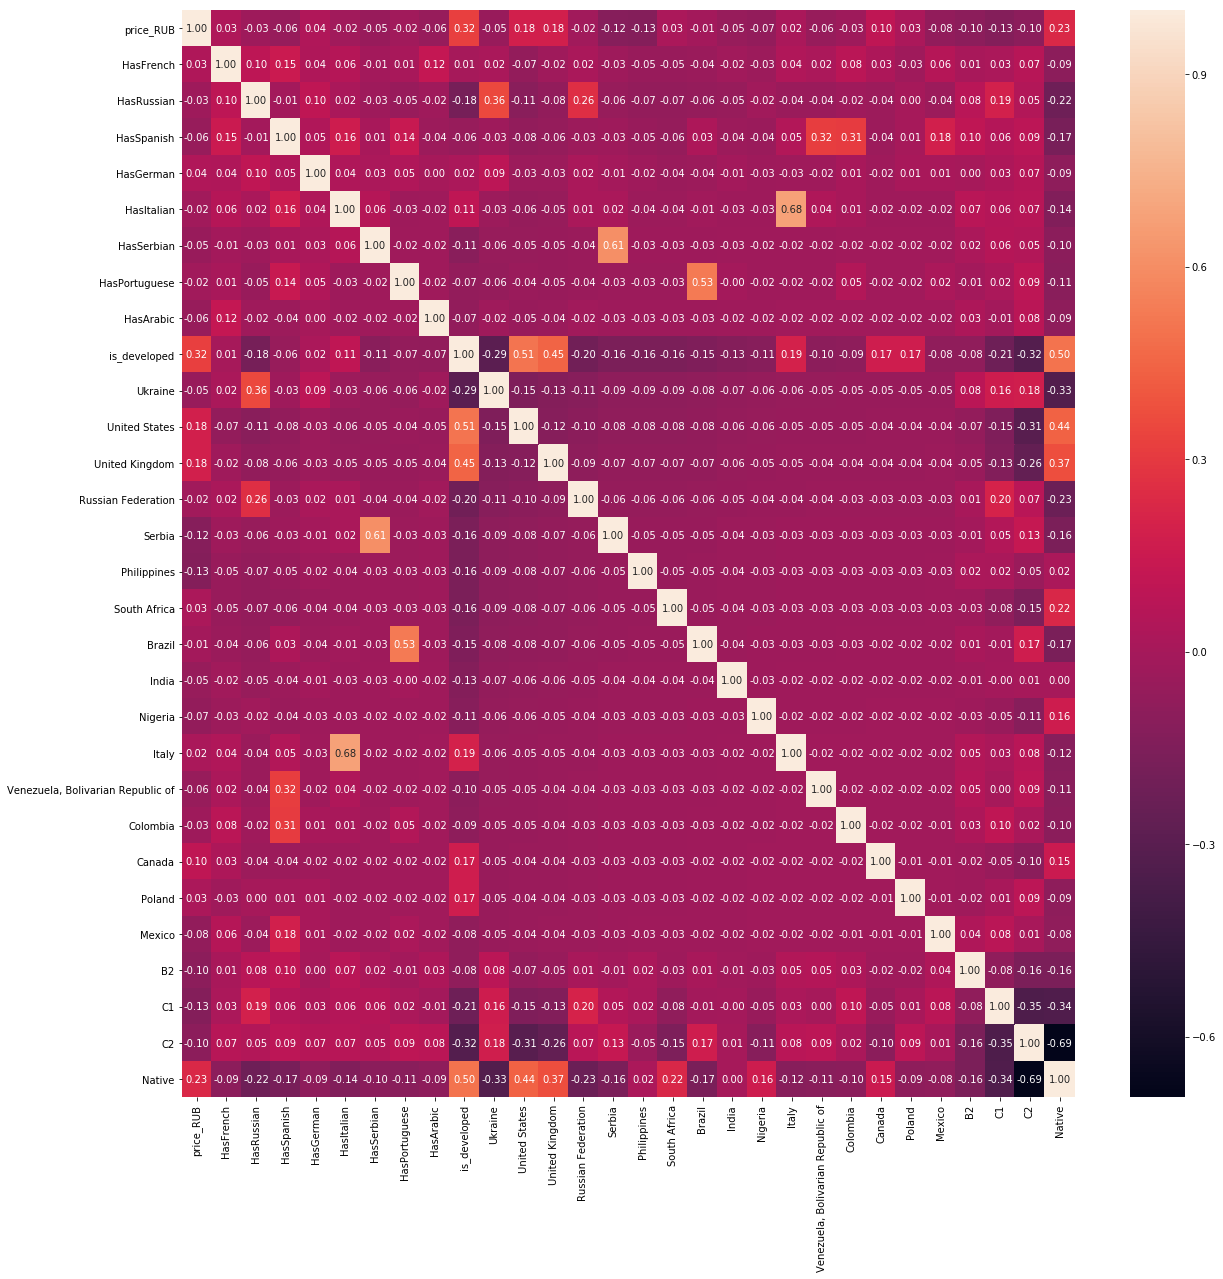

In [23]:
import numpy as np; np.random.seed(1)
import pandas as pd
import seaborn.apionly as sns
import matplotlib.pyplot as plt

# Generate a random dataset
corr = df.reset_index().drop(columns = ['index', 'experience', 'lessons', 'rating', 'reviews',
       'user_id', 'prof_mean', 'prof_std', 'nice_mean', 'nice_std', 'number_subjects',
       'number_langs', 'length_descr'], axis = 1).corr()

plt.figure(figsize = (20, 20))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()



In [9]:
import pandas as pd
d = pd.read_pickle('datas.pkl')
levels = []
for k in d['languages'].values:
    
    eng = [i[1] for i in k if i[0] == 'English'][0]
    levs = {eng:1}
    for z in ['B2', 'C1', 'C2', 'Native']:
        if eng != z:
            levs.update({z:0})
    levels.append(levs)

In [15]:
levs = pd.DataFrame(levels)
d = d[['user_id']]
d['B2'] = levs['B2']
d['C1'] = levs['C1']
d['C2'] = levs['C2']
d['Native'] = levs['Native']

In [16]:
d

,user_id,B2,C1,C2,Native
0,1,0,0,0,1
1,2,0,0,0,1
2,3,0,0,0,1
3,4,0,0,0,1
4,5,0,0,0,1
5,6,0,0,0,1
6,7,0,0,0,1
7,8,0,0,0,1
8,9,0,0,0,1
9,10,0,0,0,1


In [4]:
import requests
from bs4 import BeautifulSoup as bs
from dateparser import parse

tutors = []
for u in range(1, 77):
    url = 'https://preply.com/en/skype/english-tutors?sort=no&s=english&page={}&cf=67.52'.format(u)
    r = requests.get(url)
    b = bs(r.text)
    bb = b.find('div', class_ = 'search-wrap').find_all('div', class_ = 'search-card js-ecom-profile js-card')
    for b_ in bb:
        tutors.append(b_['data-url'])
    print(u)
tutors = [t[2:] for t in tutors]

C:\anaconda\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\anaconda\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76


In [47]:
datas = []
passed = []

a = 584
for u in tutors[583:]:

#     u = tutors[0]
#     u = 'preply.com/en/tutor/11783/'
    r = requests.get('https://' + u)
    b = bs(r.text)

    price = b.find('div', class_ = 'tutor-price').text.strip()

    prof = b.find('div', class_ = 'profile__wrap')
    photo = 'https:' + prof.find('div', class_ = 'avatar avatar--profile avatar--square')['style'].split('url')[1].replace("'", '').replace('(', '').replace(')', '')

    name = prof.find('div', class_ = 'profile__cell profile__main').find('div', class_ ='profile__head').find('span', class_ = 'ecom-name').text.split()
    name = ' '.join(name)
    country = prof.find('div', class_ = 'profile__cell profile__main').find('div', class_ ='profile__head').find('span', class_ = 'hint hint--bottom hint--auto hint--auto-width').text.split()
    country  = ' '.join(country)
    info_short = prof.find('h1', class_ = 'profile__info').text.split()
    info_short  = ' '.join(info_short)

    languages = []
    for lang in prof.find_all('span', class_ = "hint-wrap hint-wrap--cursor-default"):
        languages.append([i for i in lang.text.strip().replace('\n', '').split(' ') if i != ''][:2])

    teach = [i for i in prof.find('li', class_ = 'list-icon__item').text.strip().replace(' ', ' ').replace('\n', '').split(' ') if i != '' and i != 'Teaches' and i != 'language']

    try:
        exp = prof.find_all('div', class_ = 'list-icon__text')[-1].text.strip().replace('\n', '').split('·')
    #     print(len(exp), exp)

        if len(exp) == 2:
            experience = float(''.join([i for i in exp[0] if i.isdigit() == True]))
            lessons = float(''.join([i for i in exp[1] if i.isdigit() == True]))
        elif len(exp) == 1:
            experience = float(''.join([i for i in exp[0] if i.isdigit() == True]))
            lessons = 0
            
    except ValueError:
        experience = 0
        lessons = 0
        

    stats = b.find('div', class_ = 'tutor-stats__item').text.strip().replace('\n', '')
    if 'reviews' in stats:
        rating = [s for s in stats.split(' ') if s != ''][0]
        reviews = [s for s in stats.split(' ') if s != ''][1]
    else:
        rating = stats
        reviews = 0
        
    try:
        preferences = {}
        for i in b.find('div', class_ = 'box__inner').find_all('div', class_ = 'box__group')[1].find_all('div', "box__col"):
            header = i.find('h4').text.strip()
            body = [k.text for k in i.find('ul').find_all('li')]
            preferences.update({header:body})
    except IndexError:
        preferences = {'Preferred student age':[], 'Preferred level of students':[]}



    aboutme = b.find('div', class_ = 'box__inner').find_all('div', class_ = 'box__group')[0].find('div', class_ = 'p-summary__short crop__target js-crop-target').text.strip().replace('\n', '')

    subjects = [k.text.strip() for k in b.find_all('h6', class_ = 'p-subjects__title')]



    data = {'tutor':u, 'price':price, 
           'photo':photo, 'name':name,
           'country':country, 'info_short':info_short,
           'languages':languages, 'teching':teach,
           'experience':experience, 'lessons':lessons,
           'rating':rating, 'reviews':reviews,
           'info_long':aboutme, 'subjects':subjects,
           'user_id':a}
    data.update(preferences)
    
    datas.append(data)
    print(a/len(tutors))
    a += 1



C:\anaconda\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\anaconda\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


0.38752488387524886
0.38818845388188455
0.38885202388852025
0.38951559389515594
0.39017916390179164
0.39084273390842733
0.391506303915063
0.3921698739216987
0.3928334439283344
0.39349701393497016
0.39416058394160586
0.39482415394824155
0.39548772395487725
0.39615129396151294
0.39681486396814863
0.39747843397478433
0.39814200398142
0.3988055739880557
0.39946914399469147
0.40013271400132716
0.40079628400796286
0.40145985401459855
0.40212342402123424
0.40278699402786994
0.40345056403450563
0.4041141340411413
0.404777704047777
0.4054412740544127
0.40610484406104846
0.40676841406768416
0.40743198407431985
0.40809555408095555
0.40875912408759124
0.40942269409422694
0.41008626410086263
0.4107498341074983
0.411413404114134
0.41207697412076977
0.41274054412740546
0.41340411413404116
0.41406768414067685
0.41473125414731254
0.41539482415394824
0.41605839416058393
0.4167219641672196
0.4173855341738553
0.418049104180491
0.41871267418712677
0.41937624419376246
0.42003981420039815
0.42070338420703385

0.6708692767086928
0.6715328467153284
0.6721964167219642
0.6728599867285998
0.6735235567352356
0.6741871267418713
0.674850696748507
0.6755142667551427
0.6761778367617783
0.6768414067684141
0.6775049767750497
0.6781685467816855
0.6788321167883211
0.6794956867949569
0.6801592568015926
0.6808228268082283
0.681486396814864
0.6821499668214996
0.6828135368281354
0.683477106834771
0.6841406768414068
0.6848042468480424
0.6854678168546782
0.6861313868613139
0.6867949568679496
0.6874585268745853
0.688122096881221
0.6887856668878567
0.6894492368944923
0.6901128069011281
0.6907763769077637
0.6914399469143995
0.6921035169210352
0.6927670869276709
0.6934306569343066
0.6940942269409422
0.694757796947578
0.6954213669542136
0.6960849369608494
0.696748506967485
0.6974120769741208
0.6980756469807564
0.6987392169873922
0.6994027869940279
0.7000663570006636
0.7007299270072993
0.7013934970139349
0.7020570670205707
0.7027206370272063
0.7033842070338421
0.7040477770404777
0.7047113470471135
0.7053749170537492

0.9588586595885866
0.9595222295952223
0.960185799601858
0.9608493696084937
0.9615129396151294
0.962176509621765
0.9628400796284008
0.9635036496350365
0.9641672196416722
0.9648307896483079
0.9654943596549436
0.9661579296615793
0.966821499668215
0.9674850696748507
0.9681486396814863
0.9688122096881221
0.9694757796947578
0.9701393497013935
0.9708029197080292
0.9714664897146649
0.9721300597213006
0.9727936297279363
0.973457199734572
0.9741207697412076
0.9747843397478434
0.9754479097544791
0.9761114797611148
0.9767750497677505
0.9774386197743862
0.9781021897810219
0.9787657597876576
0.9794293297942933
0.980092899800929
0.9807564698075647
0.9814200398142005
0.9820836098208361
0.9827471798274718
0.9834107498341075
0.9840743198407432
0.9847378898473789
0.9854014598540146
0.9860650298606503
0.986728599867286
0.9873921698739216
0.9880557398805574
0.9887193098871931
0.9893828798938288
0.9900464499004645
0.9907100199071002
0.9913735899137359
0.9920371599203716
0.9927007299270073
0.993364299933643


In [26]:
import pandas as pd
import numpy as np
raz = pd.read_pickle('razmetka.pkl').drop(['nice', 'prof'], axis = 1)

raz

,photo,tutor,user_id
0,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/90393/,1
1,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/69011/,2
2,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/66102/,3
3,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/87865/,4
4,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/18692/,5
5,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/85001/,6
6,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/62225/,7
7,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/45900/,8
8,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/75930/,9
9,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/90068/,10


In [27]:

for i in ['Luka', 'Vlada', 'Andrei', 'Egor']:
    d = pd.read_excel('{}.xlsx'.format(i))[['user_id', 'prof', 'nice']].rename(columns = {'prof':'prof_{}'.format(i), 'nice':'nice_{}'.format(i)})
    raz = raz.merge(d, right_on = 'user_id', left_on='user_id').rename(columns = {'prof':'prof_{}'.format(i)})

In [28]:
records = raz[['photo', 'user_id']].to_dict('records')

In [29]:
raz.replace('-', np.nan)[[i for i in raz.columns if 'nice' in i]].describe()

,nice_Luka,nice_Vlada,nice_Andrei,nice_Egor
count,1508.000000,1505.000000,1501.000000,1023.000000
mean,6.566313,4.754153,5.481013,5.721408
std,2.337253,1.511269,3.052945,1.568901
min,3.000000,1.000000,1.000000,1.000000
25%,4.750000,4.000000,4.000000,5.000000
50%,7.000000,5.000000,5.000000,6.000000
75%,9.000000,6.000000,7.000000,7.000000
max,10.000000,10.000000,93.000000,10.000000


In [30]:
datas = pd.read_pickle('datas.pkl').merge(raz, right_on = 'user_id', left_on = 'user_id')

In [31]:
print(datas.columns)
datas.head()

Index(['Preferred level of students', 'Preferred student age', 'country',
       'experience', 'info_long', 'info_short', 'languages', 'lessons', 'name',
       'photo_x', 'price', 'rating', 'reviews', 'subjects', 'teching',
       'tutor_x', 'user_id', 'photo_y', 'tutor_y', 'prof_Luka', 'nice_Luka',
       'prof_Vlada', 'nice_Vlada', 'prof_Andrei', 'nice_Andrei', 'prof_Egor',
       'nice_Egor'],
      dtype='object')


,Preferred level of students,Preferred student age,country,experience,info_long,info_short,languages,lessons,name,photo_x,...,photo_y,tutor_y,prof_Luka,nice_Luka,prof_Vlada,nice_Vlada,prof_Andrei,nice_Andrei,prof_Egor,nice_Egor
0,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Secondary school (12-17), Undergraduates (17-...",United States of America,5.0,Greetings! My experience teaching English beg...,Certified TOEFL Instructor with 14 years exper...,"[[English, Native], [Spanish, C2]]",14.0,Kelly M.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,...,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/90393/,5,9,8.0,8.0,5,7,6.0,5.0
1,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Undergraduates (17-22), Adults (23-40), Adult...",United States of America,75.0,PRONUNCIATION / EXPRESSIONS / FLUENCYDo you wa...,Practical California English,"[[English, Native], [Spanish, B2]]",3.0,Sean T.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,...,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/69011/,8,4,5.0,4.0,6,6,5.0,5.0
2,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Undergraduates (17-22), Adults (23-40), Adult...",United States of America,3531.0,"Hey guys, My name is Sed, I am 24 Years, profe...",Native English Speaker With Business and Human...,"[[English, Native]]",2.0,Sed A.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,...,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/66102/,6,5,3.0,4.0,5,3,6.0,6.0
3,"[Intermediate, Upper Intermediate, Advanced, P...","[Undergraduates (17-22), Adults (23-40), Adult...",United Kingdom,282.0,I am a British Native who has been teaching in...,"Conversational and Technology Related English,...","[[Spanish, A2], [English, Native]]",5.0,Aaron W.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,...,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/87865/,9,8,4.0,3.0,7,8,7.0,7.0
4,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Secondary school (12-17), Undergraduates (17-...",United Kingdom,486.0,I have been teaching language testing systems ...,"CELTA, TESOL, Law degree - 20 years teaching e...","[[English, Native], [Thai, A2]]",17.0,Michael C.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,...,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/18692/,5,5,6.0,4.0,10,5,NaN,NaN


In [32]:
teaching = []
k = []
for u in datas['teching'].values:

    u = ''.join(u)
    
    a = u.split(',')
    for i in a:
        k.append(i)
    teaching.append(a)
datas['teching'] = teaching

for lang in ['French', 'Russian', 'Spanish', 'German', 'Italian', 'Serbian', 'Portuguese', 'Arabic']:
    datas['Has{}'.format(lang)] = datas['teching'].apply(lambda s: np.where(lang in s, 1, 0))

In [33]:
datas['Subjects'] = datas['teching'].apply(lambda x: len(x))

In [34]:
datas

,Preferred level of students,Preferred student age,country,experience,info_long,info_short,languages,lessons,name,photo_x,...,nice_Egor,HasFrench,HasRussian,HasSpanish,HasGerman,HasItalian,HasSerbian,HasPortuguese,HasArabic,Subjects
0,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Secondary school (12-17), Undergraduates (17-...",United States of America,5.0,Greetings! My experience teaching English beg...,Certified TOEFL Instructor with 14 years exper...,"[[English, Native], [Spanish, C2]]",14.0,Kelly M.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,...,5.0,0,0,0,0,0,0,0,0,1
1,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Undergraduates (17-22), Adults (23-40), Adult...",United States of America,75.0,PRONUNCIATION / EXPRESSIONS / FLUENCYDo you wa...,Practical California English,"[[English, Native], [Spanish, B2]]",3.0,Sean T.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,...,5.0,0,0,0,0,0,0,0,0,1
2,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Undergraduates (17-22), Adults (23-40), Adult...",United States of America,3531.0,"Hey guys, My name is Sed, I am 24 Years, profe...",Native English Speaker With Business and Human...,"[[English, Native]]",2.0,Sed A.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,...,6.0,0,0,0,0,0,0,0,0,1
3,"[Intermediate, Upper Intermediate, Advanced, P...","[Undergraduates (17-22), Adults (23-40), Adult...",United Kingdom,282.0,I am a British Native who has been teaching in...,"Conversational and Technology Related English,...","[[Spanish, A2], [English, Native]]",5.0,Aaron W.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,...,7.0,0,0,0,0,0,0,0,0,1
4,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Secondary school (12-17), Undergraduates (17-...",United Kingdom,486.0,I have been teaching language testing systems ...,"CELTA, TESOL, Law degree - 20 years teaching e...","[[English, Native], [Thai, A2]]",17.0,Michael C.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,...,NaN,0,0,0,0,0,0,0,0,1
5,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Primary school (6-12), Secondary school (12-1...",United States of America,442.0,"California USA, English lecturer, text book au...",English Language Specialist TESOL certified. B...,"[[Spanish, A1], [English, Native], [Lithuanian...",21.0,Daniel K.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,...,NaN,0,0,0,0,0,0,0,0,1
6,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Toddlers (1-3), Preschoolers (4-6), Primary s...",United States of America,4.0,Hi there! My name is Lily and I am Greek-Ameri...,Experienced Online Native English Teacher,"[[English, Native], [Greek, Native]]",2.0,Lily V.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,...,5.0,0,0,0,0,0,0,0,0,1
7,"[Pre Intermediate, Intermediate, Upper Interme...","[Undergraduates (17-22), Adults (23-40), Adult...",Jamaica,657.0,Hello! Thanks for stopping by ✋. My name is Ra...,Experienced Native English Speaker and Certifi...,"[[English, Native]]",2.0,Ray R.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,...,NaN,0,0,0,0,0,0,0,0,1
8,NaN,NaN,Ghana,883.0,I am currently a PhD Candidate at Kharkiv Nati...,Certified IELTS tutor with 20+ years of experi...,"[[English, Native], [Russian, B1]]",20.0,Desmond A.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,...,7.0,0,0,0,0,0,0,0,0,1
9,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Primary school (6-12), Secondary school (12-1...",United States of America,59.0,Hello! TESOL certified tutor with 3+ years exp...,"ESL Tutor certified, 3 years experience","[[English, Native]]",3.0,Russell P.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,...,7.0,0,0,0,0,0,0,0,0,1


In [35]:
zip_ = zip(['Iran',
 'United States of America',
 'Moldova',
 'Venezuela',
 'Taiwan',
 'Vietnam',
 'Russia',
 'Syria',
 'Macedonia',
 'South Korea'], ['Iran, Islamic Republic of', 'United States', 'Moldova, Republic of', 'Venezuela, Bolivarian Republic of', 'Taiwan, Province of China', 'Viet Nam',
'Russian Federation', 'Syrian Arab Republic', 'Macedonia, Republic of', 'Korea, Republic of'])
zip_ = list(zip_)
for i in zip_:
    datas.replace(i[0], i[1], inplace=True)

ii = list(datas['country'].values)
sorted([[ii.count(i), i] for i in set(ii)])
['Ukraine', 'United States of America', 'United Kingdom', 'Russia', 'South Africa', 'Philippines', 'Brazil', 'India', 'Nigeria', 'Italy']

['Ukraine',
 'United States of America',
 'United Kingdom',
 'Russia',
 'South Africa',
 'Philippines',
 'Brazil',
 'India',
 'Nigeria',
 'Italy']

In [36]:
import pycountry


countries = list(pycountry.countries)
cc = [i for i in countries if i.name in list(set(ii))]
# aa = ['Iran, Islamic Republic of', 'United States', 'Moldova, Republic of', 'Venezuela, Bolivarian Republic of', 'Taiwan, Province of China', 'Viet Nam',
# 'Russian Federation', 'Syrian Arab Republic', 'Macedonia, Republic of', 'Korea, Republic of']
# for c in [i for i in countries if i.name in aa]:
#     cc.append(c)


In [37]:
tags = pd.DataFrame([[c.alpha_3, c.name] for c in cc], columns = ['tag', 'country'])
datas = datas.merge(tags, left_on = 'country', right_on = 'country')

In [38]:
datas['tag'].value_counts()

UKR    212
USA    179
GBR    143
RUS    110
SRB     71
ZAF     70
PHL     70
BRA     61
IND     44
NGA     35
ITA     29
VEN     27
COL     23
POL     22
CAN     22
MEX     20
PAK     17
GHA     16
EGY     14
TUR     14
FRA     14
CHN     13
BIH     13
IRL     13
AUS     11
DEU     11
ZWE     10
NZL     10
ESP     10
IRN      9
      ... 
SYR      3
MLT      2
DZA      2
SVK      2
PRI      2
ECU      2
IRQ      2
SLV      2
KAZ      2
ARE      2
CZE      2
LBN      2
AFG      1
JOR      1
KOR      1
NPL      1
UZB      1
CRI      1
THA      1
FJI      1
CHL      1
LTU      1
HRV      1
RWA      1
YEM      1
KGZ      1
BEN      1
CYP      1
ATG      1
SAU      1
Name: tag, Length: 94, dtype: int64

In [39]:
import currencylayer
exchange_rate = currencylayer.Client(access_key='e9670eca06b223e0f4189e8e6cafb5ba')
curs = exchange_rate.live_rates()
def convert(from_, to_, amount):
    
    if from_ == 'USD':
        rate = from_.upper() + to_.upper()
        number = float(curs['quotes'][rate])*amount
        
    elif to_ == 'USD':
        rate = to_.upper() + from_.upper()
        number = amount/float(curs['quotes'][rate])
    else:
        number = np.nan
    return float(round(number, 2))
convert('RUB', 'USD', 1)

0.02

In [40]:
from forex_python.converter import CurrencyRates
c = CurrencyRates()
prices = []
for price in datas['price'].values:

    if 'RUB' in price:
        prices.append(float(price[3:]))
    elif '$' in price:
        print(price.replace('$', ''))
        k = convert('USD', 'RUB', float(price.replace('$', '')))
        prices.append(k)
    else:
        x = convert(price[0:3], 'USD', int(price[3:]))
#         print(x)
        xx = convert('USD', 'RUB', int(x))
        prices.append(round(xx, 2))
#         print(price, x, xx)
datas['price_RUB'] = prices

18
25
12
20
14
18
26
50
16
16
17
35
30
18
25
25
40
16
25
22
15
15
17
25
40
40
25
19
22
30
10
20
60
22
23
25
25
30
16
25
24
24
19
40
40
20
30
21
20
21
17
18
20
15
20
23
14
15
10
7
20
15
20
20
15
25
25
15
10


In [252]:
for row in datas.iterrows():
    if row[1]['rating'] == 'New tutor':
        datas.loc[row[0], 'rating'] = 0
        pass
    elif 'review' in row[1]['rating']:
        x = row[1]['rating'].split('review')
        datas.loc[row[0], 'rating'] = x[0].split(' ')[0]
        datas.loc[row[0], 'reviews'] = 1
#         print(float(x[0].split(' ')[0]))

In [277]:
datas['rating'] = datas['rating'].astype(float)
datas['reviews'] = datas['reviews'].astype(float)
datas['number_subjects'] = datas['subjects'].apply(lambda x: len(x))
datas['number_langs'] = datas['teching'].apply(lambda x: len(x))
datas['length_descr'] = datas['info_long'].apply(lambda x: len(x.split(' '))) + datas['info_short'].apply(lambda x: len(x.split(' ')))

In [278]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1507 entries, 0 to 1506
Data columns (total 40 columns):
Preferred level of students    1301 non-null object
Preferred student age          1360 non-null object
country                        1507 non-null object
experience                     1507 non-null float64
info_long                      1507 non-null object
info_short                     1507 non-null object
languages                      1507 non-null object
lessons                        1507 non-null float64
name                           1507 non-null object
photo_x                        1507 non-null object
price                          1507 non-null object
rating                         1507 non-null float64
reviews                        1507 non-null float64
subjects                       1507 non-null object
teching                        1507 non-null object
tutor_x                        1507 non-null object
user_id                        1507 non-null int64
photo_

In [279]:
datas[datas.columns[:12]].head(15)

,Preferred level of students,Preferred student age,country,experience,info_long,info_short,languages,lessons,name,photo_x,price,rating
0,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Secondary school (12-17), Undergraduates (17-...",United States,5.0,Greetings! My experience teaching English beg...,Certified TOEFL Instructor with 14 years exper...,"[[English, Native], [Spanish, C2]]",14.0,Kelly M.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,RUB1678,0.0
1,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Undergraduates (17-22), Adults (23-40), Adult...",United States,75.0,PRONUNCIATION / EXPRESSIONS / FLUENCYDo you wa...,Practical California English,"[[English, Native], [Spanish, B2]]",3.0,Sean T.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,RUB1141,5.0
2,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Undergraduates (17-22), Adults (23-40), Adult...",United States,3531.0,"Hey guys, My name is Sed, I am 24 Years, profe...",Native English Speaker With Business and Human...,"[[English, Native]]",2.0,Sed A.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,$18,4.9
3,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Primary school (6-12), Secondary school (12-1...",United States,442.0,"California USA, English lecturer, text book au...",English Language Specialist TESOL certified. B...,"[[Spanish, A1], [English, Native], [Lithuanian...",21.0,Daniel K.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,$25,4.8
4,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Toddlers (1-3), Preschoolers (4-6), Primary s...",United States,4.0,Hi there! My name is Lily and I am Greek-Ameri...,Experienced Online Native English Teacher,"[[English, Native], [Greek, Native]]",2.0,Lily V.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,EUR12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Toddlers (1-3), Preschoolers (4-6), Primary s...",United States,22.0,I use the PPP method. Presentation. Practice. ...,Certified with SEE TEFL fun and effective lessons,"[[English, Native], [French, A2]]",1.0,kyra c.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,RUB1208,5.0
11,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Preschoolers (4-6), Primary school (6-12), Se...",United States,70.0,"If you are learning English, you want a native...","English, writing and literature are my passions!","[[Spanish, B2], [English, Native]]",5.0,Kate G.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,RUB1946,5.0
12,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Primary school (6-12), Secondary school (12-1...",United States,1122.0,I went to college at Oklahoma State University...,I'm a conversation coach that works with stude...,"[[English, Native]]",0.0,Julian F.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,RUB738,4.9
13,"[Beginner, Pre Intermediate, Intermediate, Upp...","[Preschoolers (4-6), Primary school (6-12), Se...",United States,522.0,Master educator just retired and now available...,"Experienced Teacher, Principal, TEFL Tutor","[[English, Native]]",30.0,Deborah H.,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,RUB2684,4.9


In [280]:
datas[datas.columns[12:]].head(15)

,reviews,subjects,teching,tutor_x,user_id,photo_y,tutor_y,prof_Luka,nice_Luka,prof_Vlada,...,HasGerman,HasItalian,HasSerbian,HasPortuguese,HasArabic,tag,price_RUB,number_subjects,number_langs,length_descr
0,0.0,"[ACT English, Ap english language & compositio...",[English],preply.com/en/tutor/90393/,1,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/90393/,5,9,8.0,...,0,0,0,0,0,USA,1678.00,13,1,210
1,2.0,"[American English, Business English, Conversat...",[English],preply.com/en/tutor/69011/,2,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/69011/,8,4,5.0,...,0,0,0,0,0,USA,1141.00,4,1,161
2,117.0,"[Conversational English, ESL]",[English],preply.com/en/tutor/44582/,3,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/66102/,6,5,3.0,...,0,0,0,0,0,USA,1197.21,2,1,144
3,9.0,"[Business English, English for Professionals, ...",[English],preply.com/en/tutor/75930/,6,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/85001/,9,9,9.0,...,0,0,0,0,0,USA,1662.79,6,1,44
4,0.0,"[Cambridge ESOL: FCE, CAE, CPE..., Conversatio...",[English],preply.com/en/tutor/90439/,7,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/62225/,9,4,8.0,...,0,0,0,0,0,USA,864.65,5,1,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1.0,"[American English, English as a Subject, Engli...",[English],preply.com/en/tutor/90222/,27,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/71317/,5,9,7.0,...,0,0,0,0,0,USA,1208.00,8,1,144
11,4.0,"[American English, Ap english, Ap english lang...","[English, Geography, SocialSciences&Humanities...",preply.com/en/tutor/78462/,29,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/78970/,10,10,6.0,...,0,0,0,0,0,USA,1946.00,39,6,394
12,15.0,"[English for kids, American English, Business ...",[English],preply.com/en/tutor/75689/,30,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/86576/,8,4,9.0,...,0,0,0,0,0,USA,738.00,4,1,110
13,3.0,"[American English, ESL, English as a Subject, ...","[English, Math]",preply.com/en/tutor/71317/,31,https://d2ft7c4kdhy773.cloudfront.net/i/logos_...,preply.com/en/tutor/59603/,6,4,7.0,...,0,0,0,0,0,USA,2684.00,7,2,47


,,price_RUB
tag,country,
AFG,Afghanistan,1342.000000
ALB,Albania,738.333333
ARE,United Arab Emirates,470.000000
ARG,Argentina,1036.650000
ARM,Armenia,711.200000
ATG,Antigua and Barbuda,3356.000000
AUS,Australia,1423.174545
AUT,Austria,2252.415000
AZE,Azerbaijan,753.646667


In [44]:
import plotly.plotly as py
import pandas as pd
import plotly

plotly.tools.set_credentials_file(username='bearty', api_key='KM6yb2JizCmMO4YkBDXF')

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
df = datas[['tag', 'country', 'price_RUB']].groupby(['tag', 'country']).agg('mean').reset_index()
data = [ dict(
        type = 'choropleth',
        locations = df['tag'],
        z = df['price_RUB'],
        text = df['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Mean<br>price'),
      ) ]

layout = dict(
    title = "Repititors' distribution of mean prices by countries"  ,
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~bearty/0 or inside your plot.ly account where it is named 'd3-world-map'


In [200]:
df = datas.groupby(['country', 'tag']).agg('count')[['experience']].rename(columns = {'experience':'frequency'}).reset_index()
df.head()

,country,tag,frequency
0,Afghanistan,AFG,1
1,Albania,ALB,3
2,Algeria,DZA,2
3,Antigua and Barbuda,ATG,1
4,Argentina,ARG,8


In [281]:
datas.columns

Index(['Preferred level of students', 'Preferred student age', 'country',
       'experience', 'info_long', 'info_short', 'languages', 'lessons', 'name',
       'photo_x', 'price', 'rating', 'reviews', 'subjects', 'teching',
       'tutor_x', 'user_id', 'photo_y', 'tutor_y', 'prof_Luka', 'nice_Luka',
       'prof_Vlada', 'nice_Vlada', 'prof_Andrei', 'nice_Andrei', 'prof_Egor',
       'nice_Egor', 'HasFrench', 'HasRussian', 'HasSpanish', 'HasGerman',
       'HasItalian', 'HasSerbian', 'HasPortuguese', 'HasArabic', 'tag',
       'price_RUB', 'number_subjects', 'number_langs', 'length_descr'],
      dtype='object')

In [291]:
datas['prof_Luka'].replace('-', np.nan, inplace = True)
datas['prof_Vlada'].replace('-', np.nan, inplace = True)
datas['prof_Andrei'].replace('-', np.nan, inplace = True)
datas['prof_Egor'].replace('-', np.nan, inplace = True)

In [294]:
datas['nice_Luka'].replace('-', np.nan, inplace = True)
datas['nice_Vlada'].replace('-', np.nan, inplace = True)
datas['nice_Andrei'].replace('-', np.nan, inplace = True)
datas['nice_Egor'].replace('-', np.nan, inplace = True)

In [295]:
np.mean([np.nan, 1, 2])

nan

In [326]:
prof_mean = []
prof_std = []
for ind, d  in datas.iterrows():
    

    list_ = [d['prof_Luka'], d['prof_Vlada'], d['prof_Andrei'], d['prof_Egor']]
    list_ = [float(l) for l in list_ if l != float(np.nan) or l!= 'nan']
    prof_mean.append(round(np.nanmean(list_), 2))
    prof_std.append(round(np.nanstd(list_), 2))
    
nice_mean = []
nice_std = []
for ind, d  in datas.iterrows():
    

    list_ = [d['nice_Luka'], d['nice_Vlada'], d['nice_Andrei'], d['nice_Egor']]
    list_ = [float(l) for l in list_ if l != float(np.nan) or l!= 'nan']
    nice_mean.append(round(np.nanmean(list_), 2))
    nice_std.append(round(np.nanstd(list_), 2))
    
    
    
    
    
datas['prof_mean'] = prof_mean
datas['nice_mean'] = nice_mean
datas['prof_std'] = prof_std
datas['nice_std'] = nice_std

In [353]:
import pandas as pd
import numpy as np


corr = datas.corr()
corr.style.background_gradient()

,experience,lessons,rating,reviews,user_id,prof_Luka,nice_Luka,prof_Vlada,nice_Vlada,prof_Andrei,nice_Andrei,prof_Egor,nice_Egor,HasFrench,HasRussian,HasSpanish,HasGerman,HasItalian,HasSerbian,HasPortuguese,HasArabic,price_RUB,number_subjects,number_langs,length_descr,prof_mean,nice_mean,prof_std,nice_std
experience,1,0.284043,0.375973,0.825516,-0.220233,-0.0148144,-0.0321675,-0.0157734,0.0267781,0.0432073,-0.0226882,-0.0205458,0.0490351,-0.00244548,0.0566614,0.0340214,0.0949825,-0.0172161,-0.00194238,0.00209834,0.0191615,0.003404,0.293778,0.113223,0.0647918,0.0153334,-0.0136488,0.00988344,-0.0332941
lessons,0.284043,1,0.352554,0.257956,-0.197421,0.00366363,-0.00433552,0.0442014,0.0260083,0.015596,-0.0256923,-0.056607,0.020006,0.0626232,0.0575143,0.0544923,0.0869442,-0.0267591,-0.038414,0.0381465,-0.0165179,0.0841412,0.285694,0.124731,0.0801202,0.014148,-0.0050881,0.000354213,-0.0370823
rating,0.375973,0.352554,1,0.390834,-0.264793,-0.0406321,-0.00388217,0.03099,0.0388503,0.0520094,-0.0439007,0.0156475,0.085742,0.0966454,0.144399,0.0863816,0.0652173,0.0604561,0.0358108,0.0181392,0.0754054,-0.0758362,0.262551,0.192748,0.113262,0.04072,3.81984e-05,0.0131855,-0.0364327
reviews,0.825516,0.257956,0.390834,1,-0.256734,-0.00675009,-0.0213638,-0.00888254,0.0403472,0.0475152,-0.00617955,0.00177413,0.0848274,0.0243867,0.0545665,0.0498593,0.0972004,-0.00575875,0.0146355,0.0264268,0.048656,0.0356825,0.36913,0.150965,0.13954,0.0305774,0.0149676,0.00878812,-0.0261739
user_id,-0.220233,-0.197421,-0.264793,-0.256734,1,0.057036,0.0111965,0.00512496,-0.00376004,0.0333618,0.0147525,-0.00674142,-0.0479338,0.00742033,-0.0385814,0.0248184,-0.00296702,0.0340929,-0.0122506,0.0217026,-0.0108825,0.00242869,-0.16959,-0.0738652,-0.0951936,0.0467579,0.00398773,0.049132,0.00239768
prof_Luka,-0.0148144,0.00366363,-0.0406321,-0.00675009,0.057036,1,-0.0326148,-0.0105273,-0.0449961,0.0135696,-0.0274791,-0.0111803,0.0207299,0.0362361,0.0285974,-0.0303565,0.0458324,-0.037476,0.00360508,0.000370344,0.00603353,0.0333468,0.00073405,0.0291537,-0.0515003,0.382908,-0.0475424,0.179102,-0.0403565
nice_Luka,-0.0321675,-0.00433552,-0.00388217,-0.0213638,0.0111965,-0.0326148,1,-0.0114431,0.0452054,0.0110241,0.0234449,-0.0285926,-0.00380508,0.0122939,-0.00326135,0.0162585,-0.0156358,0.000343374,0.00286562,-0.00722735,0.0136627,0.0245498,-0.000368973,-0.0134395,0.0337702,-0.0143136,0.56826,0.0264087,0.300383
prof_Vlada,-0.0157734,0.0442014,0.03099,-0.00888254,0.00512496,-0.0105273,-0.0114431,1,0.576369,0.0163882,-0.0446568,0.166625,0.0805381,-0.0104507,-0.0080669,-0.0214451,0.0277848,0.00168158,0.00402775,0.0058996,0.0199518,-0.00355006,0.0162396,-0.0122623,0.033553,0.475233,0.185762,-0.138637,-0.136161
nice_Vlada,0.0267781,0.0260083,0.0388503,0.0403472,-0.00376004,-0.0449961,0.0452054,0.576369,1,0.0291848,-0.00802878,0.0928371,0.156179,-0.0114549,0.00191503,-0.00448472,0.0045267,-0.0178045,-0.00425366,0.0192905,-0.0222909,0.000555849,0.00805386,-0.0211168,0.0400615,0.270786,0.403746,-0.0585606,-0.104791
prof_Andrei,0.0432073,0.015596,0.0520094,0.0475152,0.0333618,0.0135696,0.0110241,0.0163882,0.0291848,1,0.0307582,0.0307373,0.0225976,-0.0114875,0.0131309,0.0779688,-0.000776917,-0.0240678,-0.0103954,0.0198887,-0.0153208,0.00501477,0.00842905,0.0159107,0.00057344,0.71344,0.0426661,0.665346,0.00692128


In [359]:
list_ = []
a = 0
for i in list(set(datas['country'].values)):
    a+=1
    print(i, a/len(set(datas['country'].values)))
    x = int(input())
    list_.append({'country':i, 'is_developed':x})

Serbia 0.010638297872340425
0
Costa Rica 0.02127659574468085
0
Venezuela, Bolivarian Republic of 0.031914893617021274
0
Latvia 0.0425531914893617
1
India 0.05319148936170213
0
Germany 0.06382978723404255
1
Yemen 0.07446808510638298
0
El Salvador 0.0851063829787234
0
United Kingdom 0.09574468085106383
1
Russian Federation 0.10638297872340426
0
Dominican Republic 0.11702127659574468
0
Jamaica 0.1276595744680851
0
Switzerland 0.13829787234042554
1
Iraq 0.14893617021276595
0
Pakistan 0.1595744680851064
0
Montenegro 0.1702127659574468
0
Colombia 0.18085106382978725
0
Malta 0.19148936170212766
1
France 0.20212765957446807
1
Bulgaria 0.2127659574468085
0
Egypt 0.22340425531914893
0
Cameroon 0.23404255319148937
0
Albania 0.24468085106382978
0
Puerto Rico 0.2553191489361702
0
Poland 0.26595744680851063
1
Italy 0.2765957446808511
1
Belize 0.2872340425531915
0
Netherlands 0.2978723404255319
1
Cyprus 0.30851063829787234
1
Nepal 0.3191489361702128
0
United Arab Emirates 0.32978723404255317
1
Moldov

In [362]:
datas = datas.merge(pd.DataFrame(list_), left_on = 'country', right_on = 'country')

In [372]:
import statsmodels.api as sm

X = datas[[ 'experience', 'lessons', 'rating', 'reviews', 'user_id', 'prof_mean', 'prof_std', 'nice_mean', 'nice_std',  'HasFrench', 'HasRussian', 'HasSpanish', 'HasGerman',
       'HasItalian', 'HasSerbian', 'HasPortuguese', 'HasArabic', 'number_subjects', 'number_langs', 'length_descr', 'is_developed']]
y = datas["price_RUB"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_RUB   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     232.3
Date:                Mon, 10 Dec 2018   Prob (F-statistic):               0.00
Time:                        06:14:34   Log-Likelihood:                -11904.
No. Observations:                1507   AIC:                         2.385e+04
Df Residuals:                    1486   BIC:                         2.396e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
experience         -0.0458      0.045     -1.023      0.306      -0.134       0.042
lessons             5.8598      2.918      2.008      0.045       0.137      11.583
rating            -35.5294      8.443     -4.208      0.000     -52.091     -18.968
reviews             1.7760      1.795      0.989      0.323      -1.746       5.298
user_id             0.1238      0.040      3.094      0.002       0.045       0.202
prof_mean          63.0081     12.388      5.086      0.000      38.708      87.309
prof_std           -8.9787     14.763     -0.608      0.543     -37.938      19.981
nice_mean          60.5389     14.980      4.041      0.000      31.155      89.922
nice_std           -0.2982     17.250     -0.017      0.986     -34.135      33.539
HasFrench         130.5439     87.569      1.491      0.136     -41.228     302.316
HasRussian         27.7163     65.403      0.424      0.672    -100.575     156.008
HasSpanish       -101.8997     67.356     -1.513      0.131    -234.023      30.224
HasGerman          45.5460     99.151      0.459      0.646    -148.945     240.037
HasItalian       -159.0600    106.956     -1.487      0.137    -368.862      50.742
HasSerbian        -78.1834    122.241     -0.640      0.523    -317.967     161.600
HasPortuguese     -32.6772    115.039     -0.284      0.776    -258.333     192.978
HasArabic        -172.4213    133.232     -1.294      0.196    -433.764      88.922
number_subjects    18.0844      3.053      5.924      0.000      12.097      24.072
number_langs      -40.8043     16.849     -2.422      0.016     -73.854      -7.755
length_descr        0.6576      0.180      3.656      0.000       0.305       1.010
is_developed      489.8939     37.732     12.983      0.000     415.880     563.908
==============================================================================
Omnibus:                     2096.796   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           864448.482
Skew:                           7.590   Prob(JB):                         0.00
Kurtosis:                     119.346   Cond. No.                     7.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

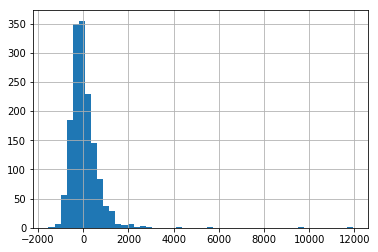

In [367]:
model.resid.hist(bins = 50)

In [391]:
data = datas[[ 'price_RUB', 'country', 'experience', 'lessons', 'rating', 'reviews', 'user_id', 'prof_mean', 'prof_std', 'nice_mean', 'nice_std',  'HasFrench', 'HasRussian', 'HasSpanish', 'HasGerman',
       'HasItalian', 'HasSerbian', 'HasPortuguese', 'HasArabic', 'number_subjects', 'number_langs', 'length_descr', 'is_developed', 'Ukraine', 'United States', 'United Kingdom', 'Russian Federation', 'Serbia', 'Philippines', 'South Africa', 'Brazil', 'India', 'Nigeria', 'Italy', 'Venezuela, Bolivarian Republic of', 'Colombia', 'Canada', 'Poland', 'Mexico']]
data.to_pickle('data.pkl')

In [388]:
top16 = ['Ukraine', 'United States', 'United Kingdom', 'Russian Federation', 'Serbia', 'Philippines', 'South Africa', 'Brazil', 'India', 'Nigeria', 'Italy', 'Venezuela, Bolivarian Republic of', 'Colombia', 'Canada', 'Poland', 'Mexico']
for top in top16:
    datas[top] = np.where(datas['country']==top, 1, 0)

In [25]:
import numpy as np
np.exp(5.79)

327.01302437597104

In [393]:
data.to_excel('data.xlsx')